<a href="https://colab.research.google.com/github/Guilherm0/Estatisticas/blob/main/ExercicioEstatisticaInferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import e Conhecendo os dados

In [ ]:
# Importação das bibliotecas
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
import datetime
from datetime import date 

In [ ]:
# Preview da qualidade dos dados
df = pd.read_csv('/content/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


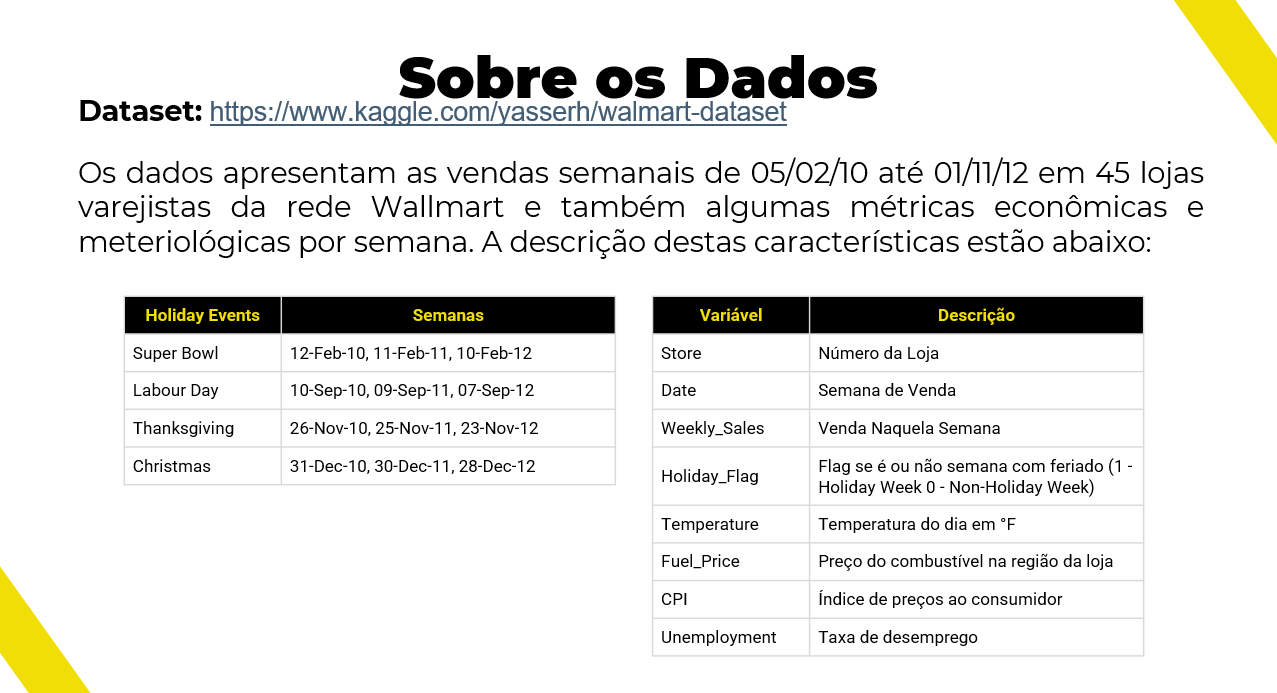

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.Date = pd.to_datetime(df.Date,format = '%d-%m-%Y')
df.Date

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


[texto do link](https://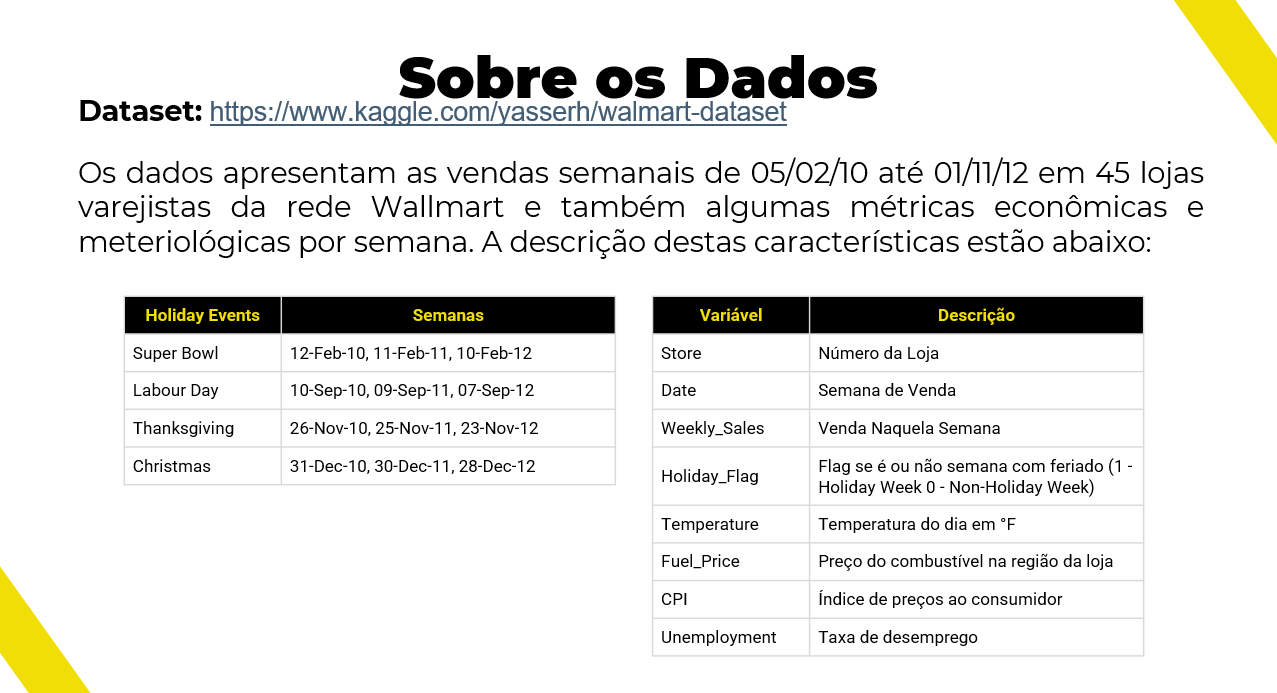)



Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**



Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [ ]:
# Todos os dados possíveis
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


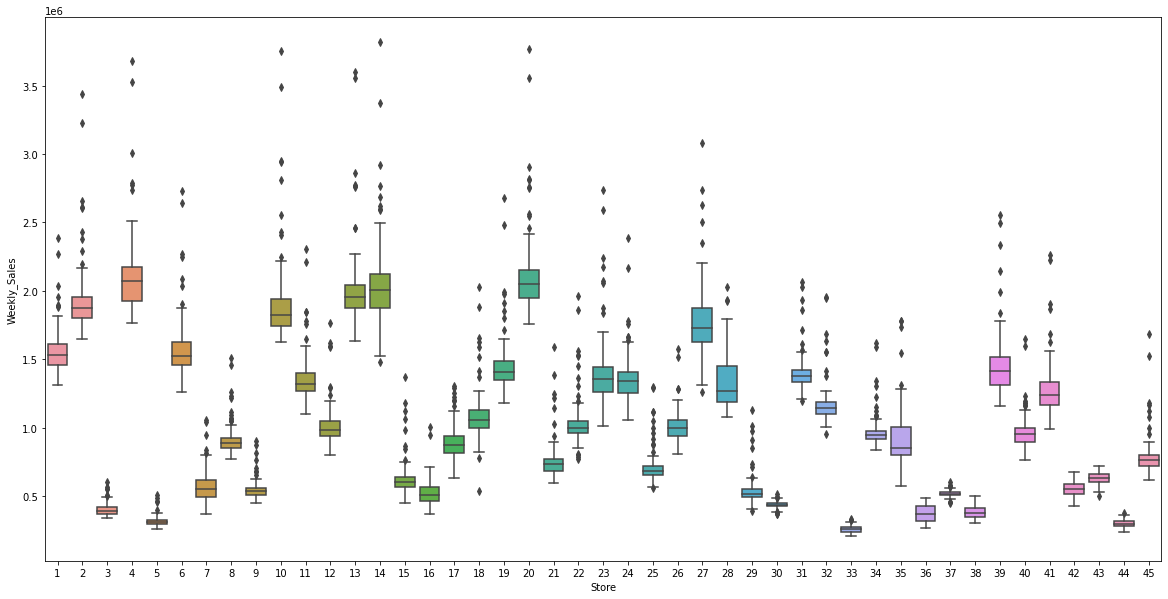

In [ ]:
# Boxplot das vendas semanais por loja
fig=plt.figure(figsize=(20,10))
sns.boxplot(y = 'Weekly_Sales',
            x = 'Store',
            data = df);

In [ ]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

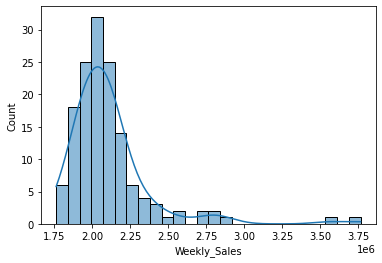

In [ ]:
# Distribuição das vendas semanais da loja 20
loja20 = df[df['Store'] ==20]
loja20
sns.histplot(loja20, x='Weekly_Sales',kde=True);

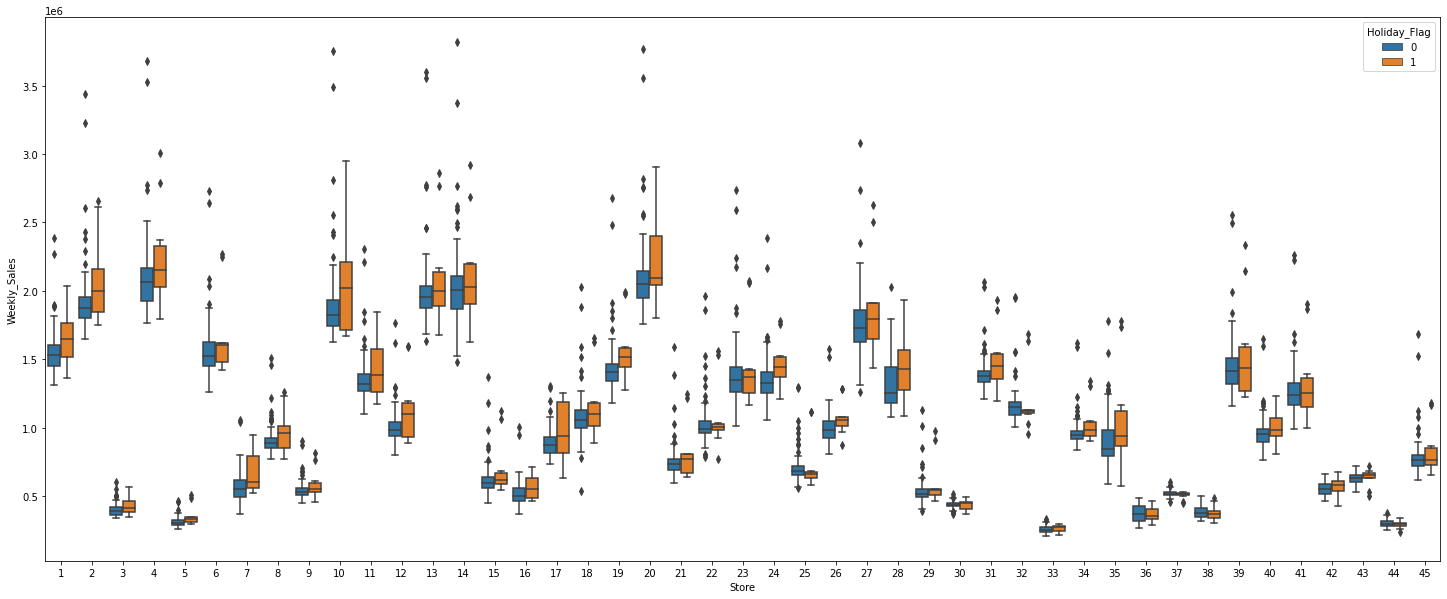

In [ ]:
# Verificando se as vendas em período de feriado tem uma variação maior
fig=plt.figure(figsize=(25,10))
sns.boxplot(y = 'Weekly_Sales',
            x = 'Store',
            data = df,hue='Holiday_Flag');

# Etapa 02

## Amostragem Simples 

In [ ]:
# Amostrando simples usando o random_state
sample_simp = df.sample(5,random_state= 0)
sample_simp

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,2011-10-14,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,2012-06-08,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,2011-10-28,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,2011-03-04,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,2011-11-11,719235.07,0,44.81,3.530,210.981020,7.082


In [ ]:
# Amostrando simples usando o seed
np.random.seed(0)
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,2011-10-14,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,2012-06-08,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,2011-10-28,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,2011-03-04,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,2011-11-11,719235.07,0,44.81,3.530,210.981020,7.082


In [ ]:
# Quantidade de classes distintas na amostra
df['Store'].sample(15, random_state=123).value_counts(normalize=True) 

## Amostragem Sistemática 

In [ ]:
# Amostragem sistemática com passo e primeiro valor definidos
passo = 25
inicial = 132
indices = np.arange(inicial,df.shape[0],passo)
amostra = df.loc[indices] #iloc
amostra


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908
157,2,2010-05-14,1880752.36,0,73.31,2.854,209.998458,8.200
182,2,2010-11-05,1939061.41,0,57.85,2.689,211.613505,8.163
207,2,2011-04-29,1745545.28,0,69.21,3.810,215.277268,7.931
232,2,2011-10-21,1834680.25,0,64.53,3.353,217.165004,7.441
...,...,...,...,...,...,...,...,...
6332,45,2010-11-12,765648.93,0,46.14,2.931,182.991613,8.724
6357,45,2011-05-06,810150.64,0,58.21,4.046,185.937438,8.521
6382,45,2011-10-28,781694.57,0,51.78,3.569,187.877491,8.523
6407,45,2012-04-20,776661.74,0,63.13,4.027,190.813801,8.567


## Amostragem Estratificada 

In [ ]:
# Verificando quantos tipos diferentes de classe temos na amostra
#sorted(df['Store'].value_counts().index)
df['Store'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
from sklearn.model_selection import train_test_split

# Amostragem estratificada usando train_test_split
X_1, X_2 = train_test_split(df, test_size = 45 #Tamanho da amostra X_2 - Amostra alvo
                            , stratify = df['Store'])
X_2['Store'].value_counts()

44    1
39    1
26    1
12    1
45    1
13    1
27    1
10    1
37    1
7     1
43    1
18    1
33    1
32    1
5     1
29    1
28    1
11    1
14    1
1     1
6     1
23    1
3     1
17    1
2     1
31    1
16    1
38    1
42    1
40    1
4     1
9     1
36    1
15    1
8     1
34    1
21    1
35    1
20    1
19    1
41    1
25    1
24    1
22    1
30    1
Name: Store, dtype: int64

## Amostragem Clusterizada 

In [ ]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20
amostra = loja20.sample(frac=0.1)
amostra

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2774,20,2011-03-11,1990932.77,0,39.53,3.582,207.188288,7.343
2781,20,2011-04-29,1881788.19,0,62.97,3.962,208.638600,7.287
2806,20,2011-10-21,2104241.90,0,53.69,3.570,210.547325,7.082
2745,20,2010-08-20,1975374.56,0,75.34,2.779,204.821704,7.527
2731,20,2010-05-14,2033211.62,0,55.91,2.982,203.613392,7.856
2728,20,2010-04-23,1878862.42,0,50.65,2.902,203.690559,7.856
2829,20,2012-03-30,2074721.74,0,51.52,3.953,214.164708,6.961
2730,20,2010-05-07,2137202.38,0,66.74,2.966,203.610178,7.856
2741,20,2010-07-23,1900535.90,0,77.75,2.771,204.481219,7.527
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

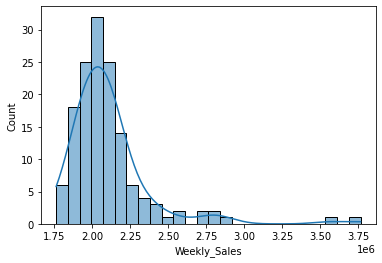

In [ ]:
# Filtrando o dataset e vendo seu histograma
sns.histplot(loja20, x='Weekly_Sales',kde=True);


In [ ]:
alpha = 10**-3
k2, p = stats.normaltest(loja20.Weekly_Sales)
print("p = {:g}".format(p))
if p < alpha:  # H0: os dados seguem uma distribuição normal
    print("H0 pode ser rejeitado")
else:
    print("H0 não pode ser rejeitado")

p = 1.86095e-27
H0 pode ser rejeitado


<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





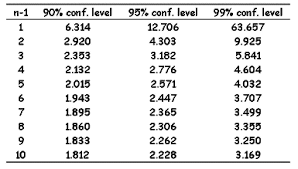

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T
amostra = df.sample(25, random_state=0)
confidence = 0.95
dof = amostra.shape[0]-1

interval = stats.t.interval(alpha=confidence, df=dof, loc=amostra.Weekly_Sales.mean(), scale = stats.sem(amostra.Weekly_Sales))
interval

(688091.2241179128, 1054502.288682087)

In [ ]:
# Verificando a média da população
df['Weekly_Sales'].mean()

1046964.8775617715

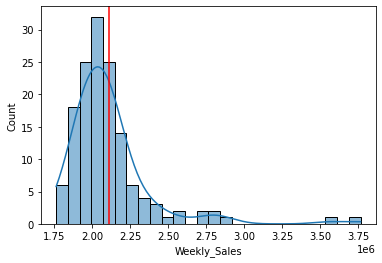

In [ ]:
# Visualizando a distribuição dos dados como ele são
sns.histplot(loja20, x='Weekly_Sales',kde=True);
plt.axvline(loja20.Weekly_Sales.mean(),0, 40,c='Red', label='Mean');

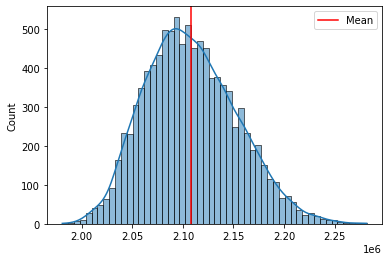

In [ ]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central
val_list = []
for i in range(10000):
  val_list.append(loja20.sample(30).Weekly_Sales.mean())

sns.histplot(val_list,kde=True)
plt.axvline(np.array(val_list).mean(),0, 40,c='Red', label='Mean')
plt.legend()

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal
amostra = loja20.sample(50, random_state=0)
confidence = 0.95

interval = stats.norm.interval(alpha=confidence, loc=amostra.Weekly_Sales.mean(), scale = stats.sem(amostra.Weekly_Sales))
interval

(2071485.9996257257, 2210783.6619742736)

In [ ]:
# Verificando a média da população
loja20['Weekly_Sales'].mean()

2107676.8703496507